In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
uploaded = files.upload()

Saving placement.csv to placement.csv


# Linear Regression

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


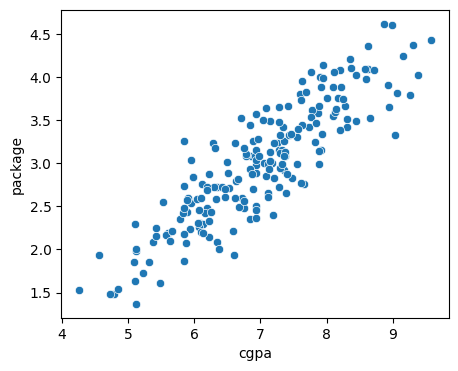

In [5]:
plt.figure(figsize = (5, 4))
sns.scatterplot(x = 'cgpa', y = 'package', data = df)
plt.show()

In [6]:
df.isnull().sum()

,0
cgpa,0
package,0


In [7]:
x = df[['cgpa']]
y = df['package']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
lr.coef_, lr.intercept_

(array([0.55795197]), np.float64(-0.8961119222429144))

In [12]:
y = 0.55795197 * 6.89 - 0.8961119222429144 # y = mx + c, x = 6.89 ( first values of cgpa )
y

2.9481771510570853

In [13]:
lr.predict([[6.89]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94817717])

# Accuracy score

In [14]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(77.33110961245032, 78.0730147510384)

In [15]:
y_pred = lr.predict(x)

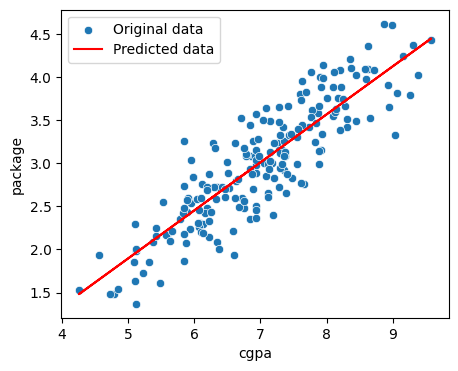

In [16]:
plt.figure(figsize = (5, 4))
sns.scatterplot(x = 'cgpa', y = 'package', data = df)
plt.plot(df['cgpa'], y_pred, color = 'red')
plt.legend(['Original data', 'Predicted data'])
plt.show()

# Multiple Linear Regression

In [17]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [18]:
df = pd.read_csv('Salary_Data.csv')

In [19]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [20]:
df.rename(columns = {'YearsExperience' : 'Experience'}, inplace = True)

In [21]:
df.isnull().sum()

,0
Experience,0
Age,0
Salary,0


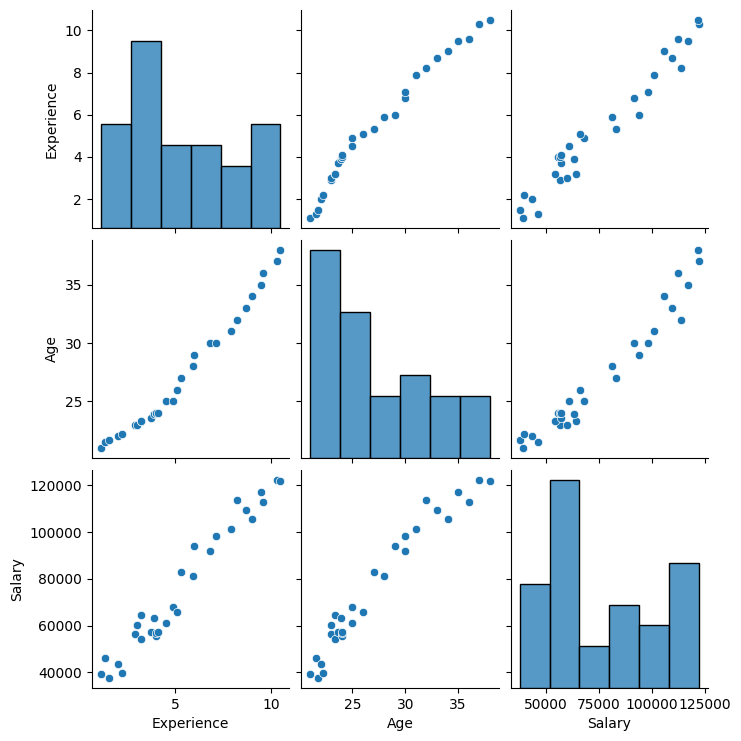

In [22]:
sns.pairplot(data = df)
plt.show()

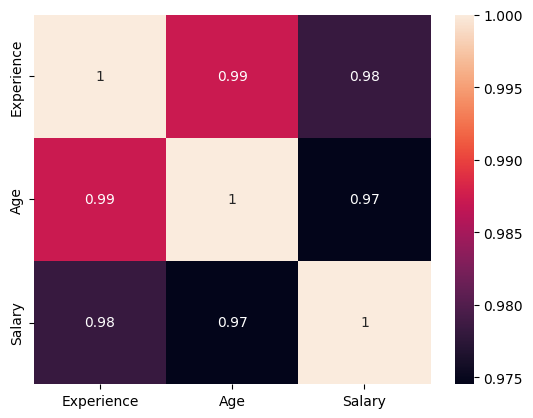

In [23]:
sns.heatmap(data = df.corr(), annot = True)
plt.show()

In [24]:
x = df.drop('Salary', axis = 1)
y = df['Salary']

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.coef_, lr.intercept_

(array([8848.26385184,  389.43773799]), np.float64(17658.261946164268))

In [29]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(96.5586867092468, 89.71347616606923)

# Polynomial regression

In [30]:
uploaded = files.upload()

Saving level_salary_data.csv to level_salary_data.csv


In [31]:
df = pd.read_csv('level_salary_data.csv')

In [32]:
df.head()

,Level,Salary
0,1,7967.14
1,2,7102.64
2,3,22065.34
3,4,39230.30
4,5,31199.49


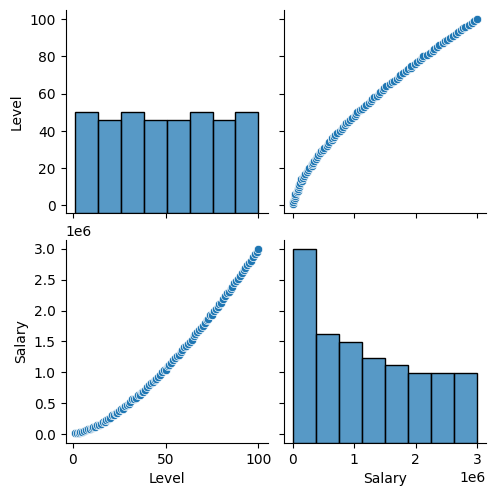

In [33]:
sns.pairplot(data = df)
plt.show()

In [34]:
x = df[['Level']]
y = df['Salary']

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures(degree = 2)
pf.fit(x)
x = pf.transform(x)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(99.96128817908235, 99.94672754001492)

In [42]:
y_pred = lr.predict(x)

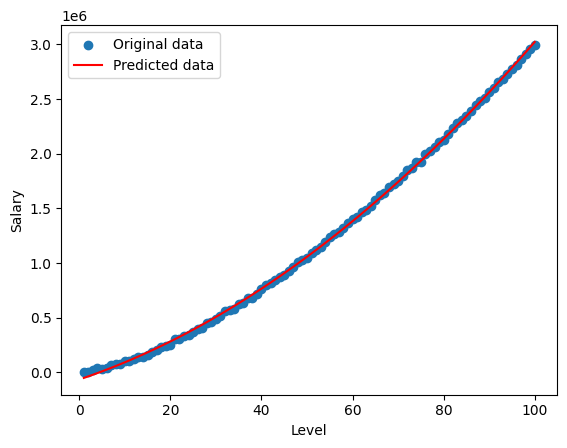

In [43]:
plt.scatter(df['Level'], df['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.plot(df['Level'], y_pred, color = 'red')
plt.legend(['Original data', 'Predicted data'])
plt.show()

# L1 and L2 Regression

In [44]:
uploaded = files.upload()

Saving housing.csv to housing.csv


In [46]:
df = pd.read_csv('housing.csv')

In [47]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [49]:
from sklearn.impute import SimpleImputer

In [50]:
si = SimpleImputer(strategy  = 'mean')

In [51]:
df['total_bedrooms'] = si.fit_transform(df[['total_bedrooms']])

In [52]:
df['total_bedrooms'].isnull().any()

np.False_

In [53]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [54]:
df.select_dtypes(include = 'object').columns

Index(['ocean_proximity'], dtype='object')

In [55]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

In [58]:
ohe1 = ohe.fit_transform(df[['ocean_proximity']])

In [59]:
df1 = pd.concat([df, ohe1], axis = 1)
df = df1.drop('ocean_proximity', axis = 1)

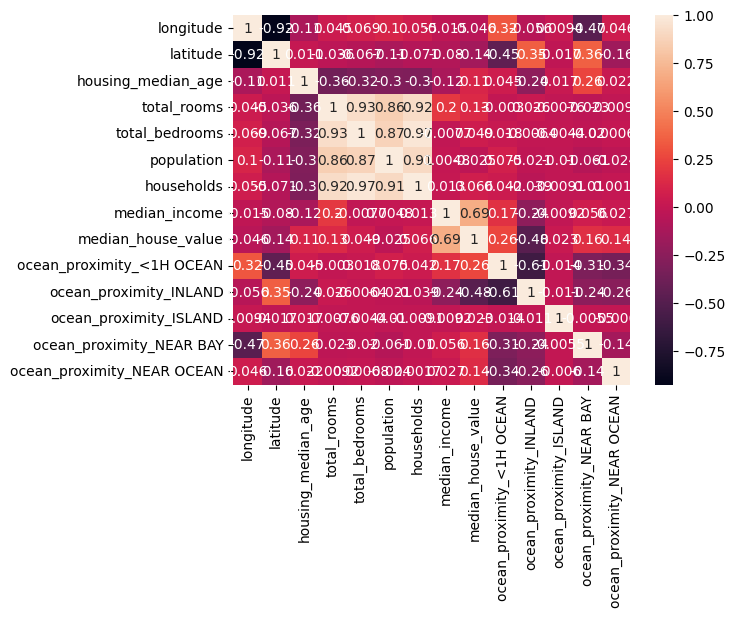

In [60]:
sns.heatmap(data = df.corr(), annot = True)
plt.show()

In [61]:
x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [62]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [64]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression

In [65]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.6469486499491455, 0.639351951552118)

In [80]:
print('Mean squared error : ',mean_squared_error(y_test, lr.predict(x_test)))
print('Mean absolute error : ', mean_absolute_error(y_test, lr.predict(x_test)))
print('R2 : ', r2_score(y_test, lr.predict(x_test)))

Mean squared error :  4858017177.752215
Mean absolute error :  50373.478661332265
R2 :  0.639351951552118


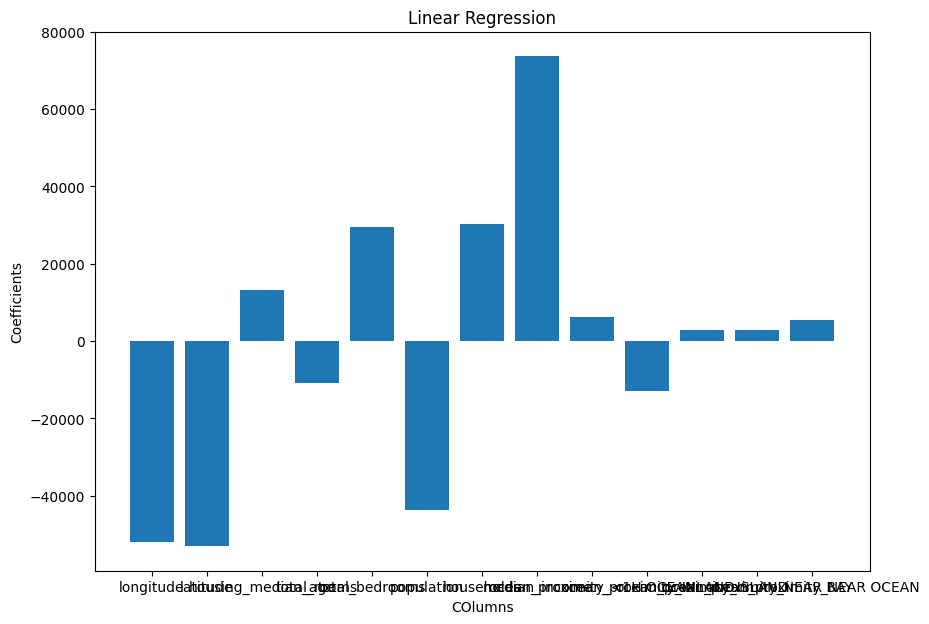

In [70]:
plt.figure(figsize = (10, 7))
plt.bar(x.columns, lr.coef_)
plt.title('Linear Regression')
plt.xlabel('COlumns')
plt.ylabel('Coefficients')
plt.show()

# Lasso Regression

In [71]:
la = Lasso(alpha = 0.5)
la.fit(x_train, y_train)
la.score(x_train, y_train), la.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.465e+12, tolerance: 2.192e+10
  model = cd_fast.enet_coordinate_descent(


(0.6469486480998692, 0.6393513508337336)

In [81]:
print('Mean squared error : ',mean_squared_error(y_test, la.predict(x_test)))
print('Mean absolute error : ', mean_absolute_error(y_test, la.predict(x_test)))
print('R2 : ', r2_score(y_test, la.predict(x_test)))

Mean squared error :  4858025269.575374
Mean absolute error :  50373.46812879513
R2 :  0.6393513508337336


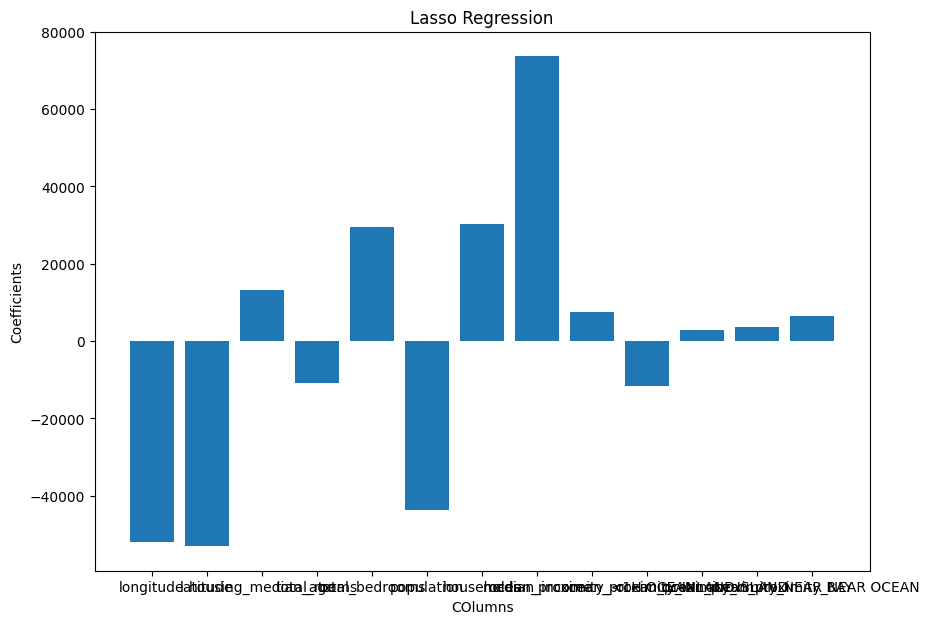

In [72]:
plt.figure(figsize = (10, 7))
plt.bar(x.columns, la.coef_)
plt.title('Lasso Regression')
plt.xlabel('COlumns')
plt.ylabel('Coefficients')
plt.show()

# Rigde regression

In [74]:
ri = Ridge(alpha = 10)
ri.fit(x_train, y_train)
ri.score(x_train, y_train), ri.score(x_test, y_test)

(0.6469425228291075, 0.639298194270026)

In [82]:
print('Mean squared error : ',mean_squared_error(y_test, ri.predict(x_test)))
print('Mean absolute error : ', mean_absolute_error(y_test, ri.predict(x_test)))
print('R2 : ', r2_score(y_test, ri.predict(x_test)))

Mean squared error :  4858741301.453859
Mean absolute error :  50369.76142573219
R2 :  0.639298194270026


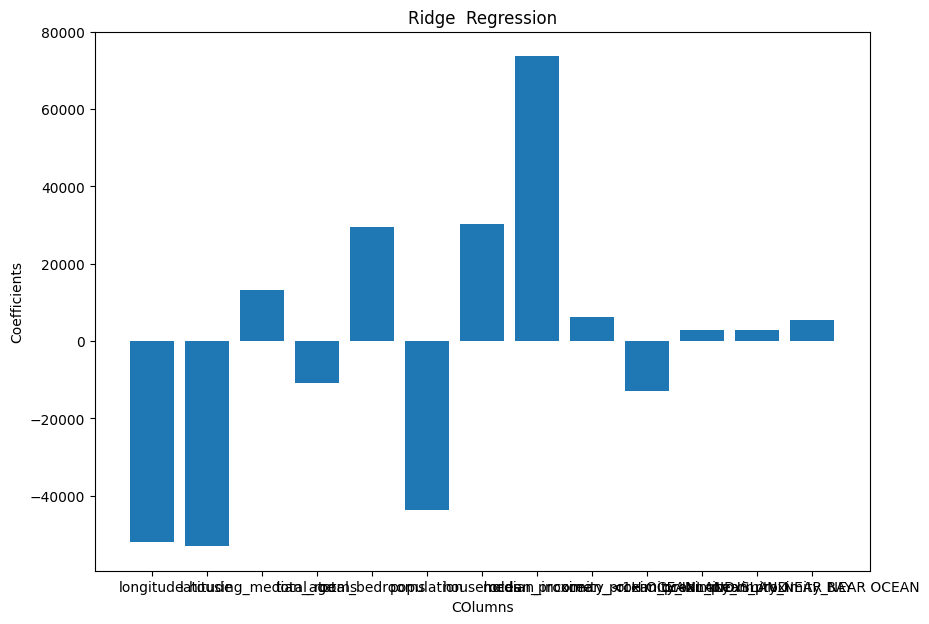

In [77]:
plt.figure(figsize = (10, 7))
plt.bar(x.columns, lr.coef_)
plt.title('Ridge  Regression')
plt.xlabel('COlumns')
plt.ylabel('Coefficients')
plt.show()